In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import pickle
import codecs
from sklearn.utils import shuffle
%matplotlib inline
plt.rcParams['figure.figsize'] = (60.0, 30.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
df = pd.read_csv("../common/dataset.csv")
df_t = df[['DEFAULT PAYMENT JAN','CUST_COD']]

df = df.set_index(['CUST_COD'], drop=True)
df = df.drop("DEFAULT PAYMENT JAN",1)
df.index.name = None

df_t = df_t.set_index(['CUST_COD'], drop=True)
df_t.index.name = None

df_real = df.copy()

In [3]:
print df_real.shape
df_real.head()

(26884, 23)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,BILL_AMT_OCT,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,581.961472,629.156401,599.283174,608.257067,89.440800,149.06800,68.571280,0.000000,29.81360,59.627200
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,3137.285128,533.872135,-2.772665,-14.399969,149.068000,159.83071,29.813600,0.000000,0.00000,0.000000
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,10.852150,-19.349026,-19.349026,-19.349026,59.627200,532.59015,16.963938,0.000000,0.00000,29.813600
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,216.744872,88.546392,70.330282,253.177091,80.556347,217.22189,88.784901,70.628418,298.46395,216.416922
41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,-1,...,29.813600,0.000000,569.439760,0.000000,119.254400,29.81360,0.000000,569.439760,0.00000,0.000000


In [4]:
print df_t.shape
df_t.head()

(26884, 1)


,DEFAULT PAYMENT JAN
53613503,0
35524089,1
58777007,0
26913418,0
41993633,1


test_1 = df.head(24)
fig, axarr = plt.subplots(8, 3,figsize=(90, 150))
fig.suptitle("TEST", fontsize=40)

x = np.arange(6)
for index,b in enumerate(test_1.iterrows()):
    bill_amt = []
    i = index%8
    j = index%3
    bill_amt.append(b[1][11])
    bill_amt.append(b[1][12])
    bill_amt.append(b[1][13])
    bill_amt.append(b[1][14])
    bill_amt.append(b[1][15])
    bill_amt.append(b[1][16])
    
    axarr[i,j].scatter(x,bill_amt)
    axarr[i,j].plot(x,bill_amt)
    axarr[i,j].set_title(str(index), size=30)
    
for index,p in enumerate(test_1.iterrows()):
    pay_amt = []
    i = index%8
    j = index%3
    pay_amt.append(p[1][17])
    pay_amt.append(p[1][18])
    pay_amt.append(p[1][19])
    pay_amt.append(p[1][20])
    pay_amt.append(p[1][21])
    pay_amt.append(p[1][22])
    
    axarr[i,j].scatter(x,pay_amt)
    axarr[i,j].plot(x,pay_amt)

plt.show()

In [6]:
SAMPLE = 12696362
idx = 33
#df = df_real.iloc[[idx]]
df = df_real.copy()
#dt = df_t.copy().iloc[[idx]]
dt = df_t.copy()
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
colors = {0:'r', 1:'b'}

In [7]:
df1["SHOP_JUL"] = df.apply(lambda row : row["BILL_AMT_JUL"] - 0 - row["PAY_AMT_JUL"], axis=1)
df1["SHOP_AUG"] = df.apply(lambda row : row["BILL_AMT_AUG"] - row["BILL_AMT_JUL"] + row["PAY_AMT_AUG"], axis=1)
df1["SHOP_SEP"] = df.apply(lambda row : row["BILL_AMT_SEP"] - row["BILL_AMT_AUG"] + row["PAY_AMT_SEP"], axis=1)
df1["SHOP_OCT"] = df.apply(lambda row : row["BILL_AMT_OCT"] - row["BILL_AMT_SEP"] + row["PAY_AMT_OCT"], axis=1)
df1["SHOP_NOV"] = df.apply(lambda row : row["BILL_AMT_NOV"] - row["BILL_AMT_OCT"] + row["PAY_AMT_NOV"], axis=1)
df1["SHOP_DEC"] = df.apply(lambda row : row["BILL_AMT_DEC"] - row["BILL_AMT_NOV"] + row["PAY_AMT_DEC"], axis=1)

In [8]:
#this columns contain for each month the difference between how much the person has spent and how much has repaid
# USCITE AL NETTO DEI REPAY
df2["SHOP_JUL_NET"] = df1.apply(lambda row : row["SHOP_JUL"] - row["PAY_AMT_JUL"], axis=1)
df2["SHOP_AUG_NET"] = df1.apply(lambda row : row["SHOP_AUG"] - row["PAY_AMT_AUG"], axis=1)
df2["SHOP_SEP_NET"] = df1.apply(lambda row : row["SHOP_SEP"] - row["PAY_AMT_SEP"], axis=1)
df2["SHOP_OCT_NET"] = df1.apply(lambda row : row["SHOP_OCT"] - row["PAY_AMT_OCT"], axis=1)
df2["SHOP_NOV_NET"] = df1.apply(lambda row : row["SHOP_NOV"] - row["PAY_AMT_NOV"], axis=1)
df2["SHOP_DEC_NET"] = df1.apply(lambda row : row["SHOP_DEC"] - row["PAY_AMT_DEC"], axis=1)

In [9]:
# NOW WE CAN ALSO DIVIDE EACH NET VALUE FOR THE LIMIT BALL !

df3["SHOP_JUL_NET"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_AUG_NET"] = df2.apply(lambda row : ( row["SHOP_AUG_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_SEP_NET"] = df2.apply(lambda row : ( row["SHOP_SEP_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_OCT_NET"] = df2.apply(lambda row : ( row["SHOP_OCT_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_NOV_NET"] = df2.apply(lambda row : ( row["SHOP_NOV_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_DEC_NET"] = df2.apply(lambda row : ( row["SHOP_DEC_NET"] ) / row["LIMIT_BAL"], axis=1)

In [10]:
df4["CUM_PAY_JUL"] = df.apply(lambda row : row["PAY_AMT_JUL"], axis=1)
df4["CUM_PAY_AUG"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"], axis=1)
df4["CUM_PAY_SEP"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"], axis=1)
df4["CUM_PAY_OCT"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"], axis=1)
df4["CUM_PAY_NOV"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"] + row["PAY_AMT_NOV"], axis=1)
df4["CUM_PAY_DEC"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"] + row["PAY_AMT_NOV"] + row["PAY_AMT_DEC"], axis=1)

In [11]:
df5["CUM_SHOP_JUL"] = df1.apply(lambda row : row["SHOP_JUL"], axis=1)
df5["CUM_SHOP_AUG"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"], axis=1)
df5["CUM_SHOP_SEP"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"], axis=1)
df5["CUM_SHOP_OCT"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"], axis=1)
df5["CUM_SHOP_NOV"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"] + row["SHOP_NOV"], axis=1)
df5["CUM_SHOP_DEC"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"] + row["SHOP_NOV"] + row["SHOP_DEC"], axis=1)

In [12]:
df6["CUM_SHOP_JUL"] = df2.apply(lambda row : row["SHOP_JUL_NET"], axis=1)
df6["CUM_SHOP_AUG"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"], axis=1)
df6["CUM_SHOP_SEP"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"], axis=1)
df6["CUM_SHOP_OCT"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"], axis=1)
df6["CUM_SHOP_NOV"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"], axis=1)
df6["CUM_SHOP_DEC"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"] + row["SHOP_DEC_NET"], axis=1)

In [13]:
df7["CUM_SHOP_JUL"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] ) / row["LIMIT_BAL"], axis=1)
df7["CUM_SHOP_AUG"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] ) / row["LIMIT_BAL"], axis=1)
df7["CUM_SHOP_SEP"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] ) / row["LIMIT_BAL"], axis=1)
df7["CUM_SHOP_OCT"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] ) / row["LIMIT_BAL"], axis=1)
df7["CUM_SHOP_NOV"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"] ) / row["LIMIT_BAL"], axis=1)
df7["CUM_SHOP_DEC"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"] + row["SHOP_DEC_NET"] ) / row["LIMIT_BAL"], axis=1)

In [14]:
print df1.shape
df1.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,SHOP_JUL,SHOP_AUG,SHOP_SEP,SHOP_OCT,SHOP_NOV,SHOP_DEC
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,548.630,20.840,29.873,21.376,29.784,1121.617
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-14.400,11.627,536.645,2633.227,68.720,48.894
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-49.163,0.000,0.000,47.165,2275.672,66.812
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,36.760,115.617,88.845,216.983,80.795,88.874


In [15]:
# + denaro in entrata al customer, - denaro in uscita al customer
print df2.shape
df2.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,SHOP_JUL_NET,SHOP_AUG_NET,SHOP_SEP_NET,SHOP_OCT_NET,SHOP_NOV_NET,SHOP_DEC_NET
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,489.003,-8.974,29.873,-47.195,-119.284,1032.177
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-14.400,11.627,536.645,2603.413,-91.110,-100.174
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-78.976,0.000,0.000,30.201,1743.082,7.185
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,-179.657,-182.847,18.216,128.198,-136.427,8.318


In [16]:
print df3.shape
df3.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,SHOP_JUL_NET,SHOP_AUG_NET,SHOP_SEP_NET,SHOP_OCT_NET,SHOP_NOV_NET,SHOP_DEC_NET
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,0.328,-0.006,0.020,-0.032,-0.080,0.692
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-0.003,0.002,0.095,0.460,-0.016,-0.018
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-0.013,0.000,0.000,0.005,0.278,0.001
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,-0.020,-0.020,0.002,0.014,-0.015,0.001


In [17]:
print df4.shape
df4.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,CUM_PAY_JUL,CUM_PAY_AUG,CUM_PAY_SEP,CUM_PAY_OCT,CUM_PAY_NOV,CUM_PAY_DEC
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,59.627,89.441,89.441,158.012,307.080,396.521
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,0.000,0.000,0.000,29.814,189.644,338.712
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,29.814,29.814,29.814,46.778,579.368,638.995
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,216.417,514.881,585.509,674.294,891.516,972.072


In [18]:
print df5.shape
df5.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,CUM_SHOP_JUL,CUM_SHOP_AUG,CUM_SHOP_SEP,CUM_SHOP_OCT,CUM_SHOP_NOV,CUM_SHOP_DEC
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,548.630,569.470,599.343,620.719,650.503,1772.120
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-14.400,-2.773,533.872,3167.099,3235.819,3284.713
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-49.163,-49.163,-49.163,-1.998,2273.675,2340.487
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,36.760,152.377,241.222,458.205,539.000,627.874


In [19]:
print df6.shape
df6.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,CUM_SHOP_JUL,CUM_SHOP_AUG,CUM_SHOP_SEP,CUM_SHOP_OCT,CUM_SHOP_NOV,CUM_SHOP_DEC
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,489.003,480.029,509.902,462.707,343.423,1375.600
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-14.400,-2.773,533.872,3137.285,3046.175,2946.001
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-78.976,-78.976,-78.976,-48.775,1694.307,1701.492
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,-179.657,-362.504,-344.287,-216.089,-352.516,-344.198


In [20]:
print df7.shape
df7.round(3).head(4)

(26884, 29)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,CUM_SHOP_JUL,CUM_SHOP_AUG,CUM_SHOP_SEP,CUM_SHOP_OCT,CUM_SHOP_NOV,CUM_SHOP_DEC
53613503,1490.680,M,university,single,NaN,0,0,0,0,2,...,68.571,0.000,29.814,59.627,0.328,0.322,0.342,0.310,0.230,0.923
35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,0,...,29.814,0.000,0.000,0.000,-0.003,-0.000,0.094,0.554,0.538,0.520
58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,-2,...,16.964,0.000,0.000,29.814,-0.013,-0.013,-0.013,-0.008,0.271,0.272
26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,...,88.785,70.628,298.464,216.417,-0.020,-0.041,-0.038,-0.024,-0.039,-0.038


In [21]:
df1s = pd.concat([df1[df1.columns[-6:]], df1[df1.columns[1:11]], df_t], axis=1)
df1s

,SHOP_JUL,SHOP_AUG,SHOP_SEP,SHOP_OCT,SHOP_NOV,SHOP_DEC,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,PAY_JUL,DEFAULT PAYMENT JAN
53613503,548.629867,20.839706,29.873227,21.376351,29.783786,1.121617e+03,M,university,single,NaN,0,0,0,0,2,0,0
35524089,-14.399969,11.627304,536.644800,2633.226593,68.720348,4.889430e+01,M,university,married,04/01/1983,0,0,0,0,0,-2,1
58777007,-49.162626,0.000000,0.000000,47.165115,2275.672088,6.681228e+01,F,high school,married,02/01/1975,0,0,-1,-1,-2,-2,0
26913418,36.760169,115.617141,88.844528,216.983381,80.794856,8.887434e+01,F,graduate school,married,15/01/1977,-2,-2,-2,-2,-2,-2,0
41993633,0.000000,569.439760,0.000000,29.813600,119.254400,2.921733e+01,F,graduate school,married,09/01/1978,-1,-1,-1,-1,-1,-1,1
46414261,1683.693246,27.816089,26.355222,735.203376,91.557566,5.503591e+01,M,university,single,27/01/1989,2,0,0,0,0,0,1
10438751,607.273218,14.250901,46.509216,9.033521,47.194929,5.622845e+01,M,university,married,08/01/1985,1,2,0,0,0,0,1
19267237,-277.087598,34.285640,112.158763,153.152463,395.089827,1.595624e+02,F,university,single,16/01/1983,-1,-1,-1,-1,0,0,0
39470148,462.080986,607.034710,-451.139395,760.306427,58.196148,3.610427e+01,M,university,single,07/01/1992,2,0,0,0,0,0,1
24381216,692.748810,95.761283,202.195835,254.846653,140.809633,5.450522e+02,F,university,married,19/01/1992,0,0,0,0,0,0,1


In [22]:
df1s = pd.concat([df1[df1.columns[-6:]], df1[df1.columns[1:11]], df_t], axis=1)
cols = df1s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df1s = df1s[cols]
df2s = pd.concat([df2[df2.columns[-6:]], df2[df2.columns[1:11]], df_t], axis=1)
cols = df2s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df2s = df2s[cols]
df3s = pd.concat([df3[df3.columns[-6:]], df3[df3.columns[1:11]], df_t], axis=1)
cols = df3s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df3s = df3s[cols]
df4s = pd.concat([df4[df4.columns[-6:]], df4[df4.columns[1:11]], df_t], axis=1)
cols = df4s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df4s = df4s[cols]
df5s = pd.concat([df5[df5.columns[-6:]], df5[df5.columns[1:11]], df_t], axis=1)
cols = df5s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df5s = df5s[cols]
df6s = pd.concat([df6[df6.columns[-6:]], df6[df6.columns[1:11]], df_t], axis=1)
cols = df6s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df6s = df6s[cols]
df7s = pd.concat([df7[df7.columns[-6:]], df7[df7.columns[1:11]], df_t], axis=1)
cols = df7s.columns
cols = [cols[0]] + [cols[15]] + [cols[1]] + [cols[14]] + [cols[2]] + [cols[13]] + [cols[3]] + [cols[12]] + [cols[4]] + [cols[11]] + [cols[5]] + [cols[10]] + [cols[6]] + [cols[7]] + [cols[8]] + [cols[9]] + [cols[16]]
df7s = df7s[cols]

In [23]:
df1s.to_csv("../common/albertom/new_data/dataset1.csv", index = True)
df2s.to_csv("../common/albertom/new_data/dataset2.csv", index = True)
df3s.to_csv("../common/albertom/new_data/dataset3.csv", index = True)
df4s.to_csv("../common/albertom/new_data/dataset4.csv", index = True)
df5s.to_csv("../common/albertom/new_data/dataset5.csv", index = True)
df6s.to_csv("../common/albertom/new_data/dataset6.csv", index = True)
df7s.to_csv("../common/albertom/new_data/dataset7.csv", index = True)
#df_final.to_csv("../common/albertom/new_data/dataset_final.csv", index = True)

In [41]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(df_t, 1, test_size=.15, random_state=0)

for idx, d in enumerate([df1s.values, df2s.values, df3s.values, df4s.values, df5s.values, df6s.values, df7s.values]):

    X = d
    for train_index, test_index in sss_1:

        X_final_train, X_final_test = shuffle(X[train_index]), shuffle(X[test_index])


        pd.DataFrame(X_final_train).to_csv("../common/albertom/new_data/train_test/" + str(idx+1) + "/train.csv", index = True)
        pd.DataFrame(X_final_test).to_csv("../common/albertom/new_data/train_test/" + str(idx+1) + "/test.csv", index = True)

x = np.arange(6)

bill_amt = []
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 16].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 15].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 14].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 13].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 12].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 11].values[0])
plt.scatter(x, bill_amt)
plt.plot(x, bill_amt, label='BILL_AMT')
    
pay_amt = []
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 22].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 21].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 20].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 19].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 18].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 17].values[0])
plt.scatter(x, pay_amt)
plt.plot(x, pay_amt, label='PAY_AMT') 

pl.xlabel("MONTH")
pl.legend(loc='upper left')

In [68]:
df1 = df1[df1.columns[-6:]]
df2 = df2[df2.columns[-6:]]
df3 = df3[df3.columns[-6:]]
df4 = df4[df4.columns[-6:]]
df5 = df5[df5.columns[-6:]]
df6 = df6[df6.columns[-6:]]
df7 = df7[df7.columns[-6:]]
df8 = df[df.columns[-6:]]
df1["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df2["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df3["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df4["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df5["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df6["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df7["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df8["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df1["TARGET"] = df1["TARGET"].apply(lambda x: colors[x])
df2["TARGET"] = df2["TARGET"].apply(lambda x: colors[x])
df3["TARGET"] = df3["TARGET"].apply(lambda x: colors[x])
df4["TARGET"] = df4["TARGET"].apply(lambda x: colors[x])
df5["TARGET"] = df5["TARGET"].apply(lambda x: colors[x])
df6["TARGET"] = df6["TARGET"].apply(lambda x: colors[x])
df7["TARGET"] = df7["TARGET"].apply(lambda x: colors[x])
df8["TARGET"] = df8["TARGET"].apply(lambda x: colors[x])

/Users/albertomariopirovano/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/albertomariopirovano/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


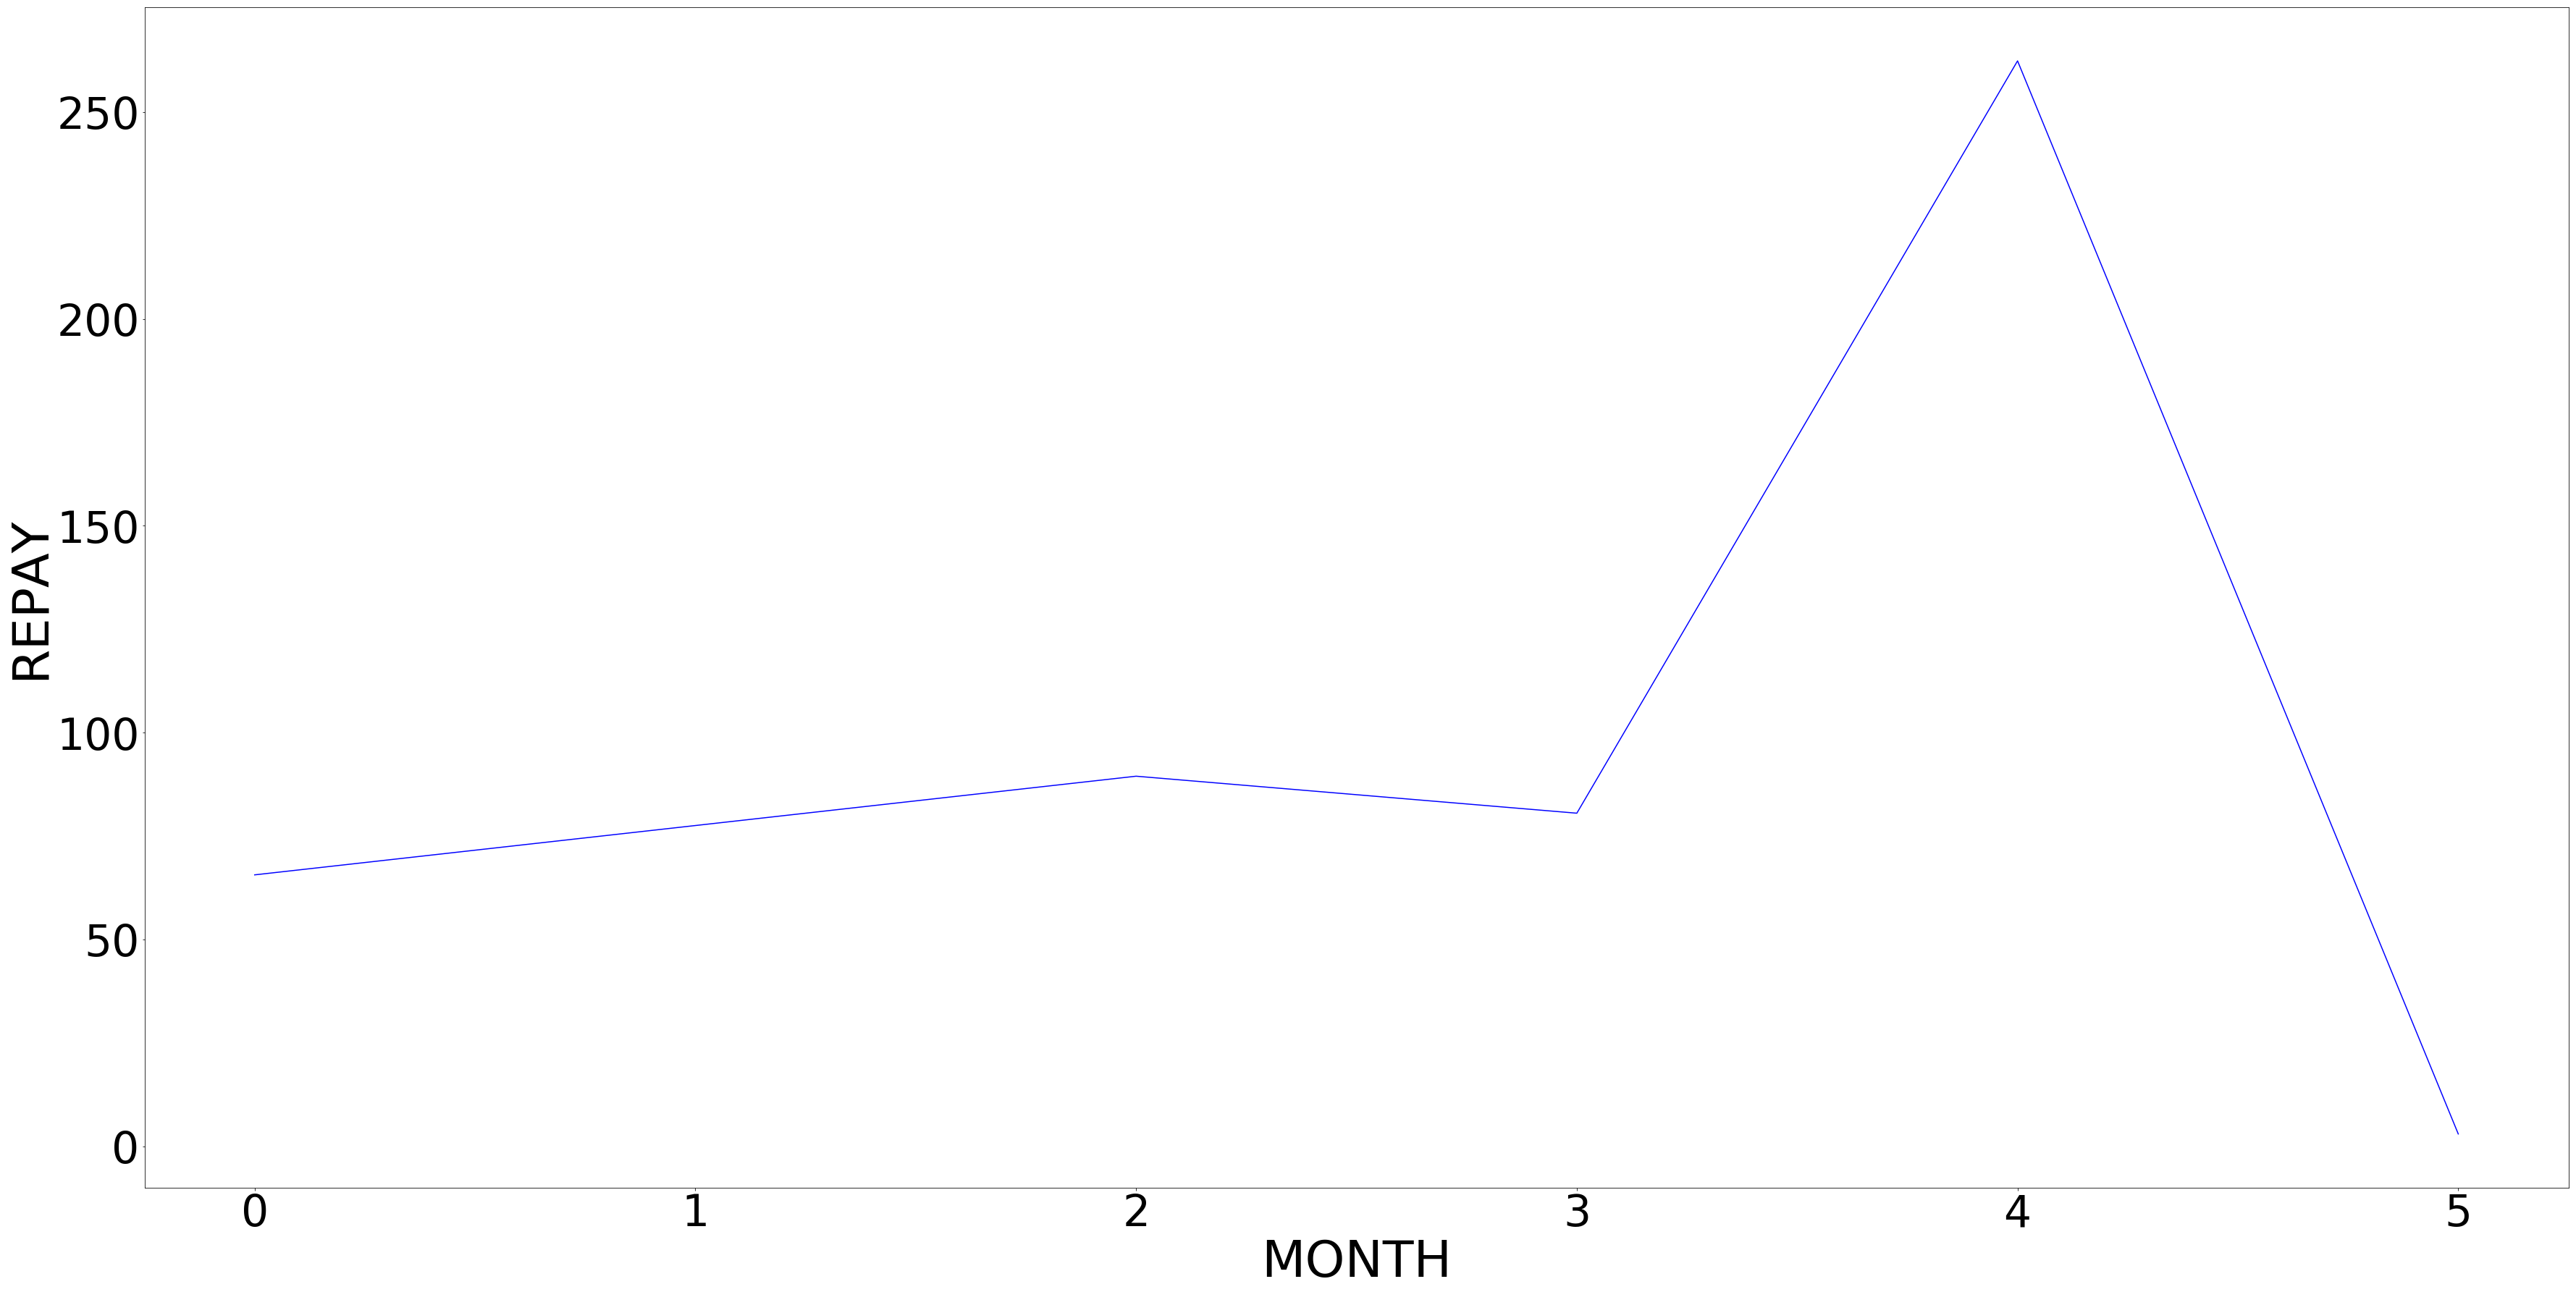

In [73]:
# NON MOLTO SENSATO, MEGLIO CONSIDERARE IL CUMULATED SHOP O ANCORA MEGLIO IL CUMULATED NET SHOP
x = np.arange(6)
for SAMPLE in df8.index:
    outgoing_amt = []
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 5].values[0])
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt.append(df8.loc[[SAMPLE]].iloc[:, 0].values[0])
    #plt.scatter(x, outgoing_amt)
    plt.plot(x, outgoing_amt, c=df8.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("REPAY", size=70)

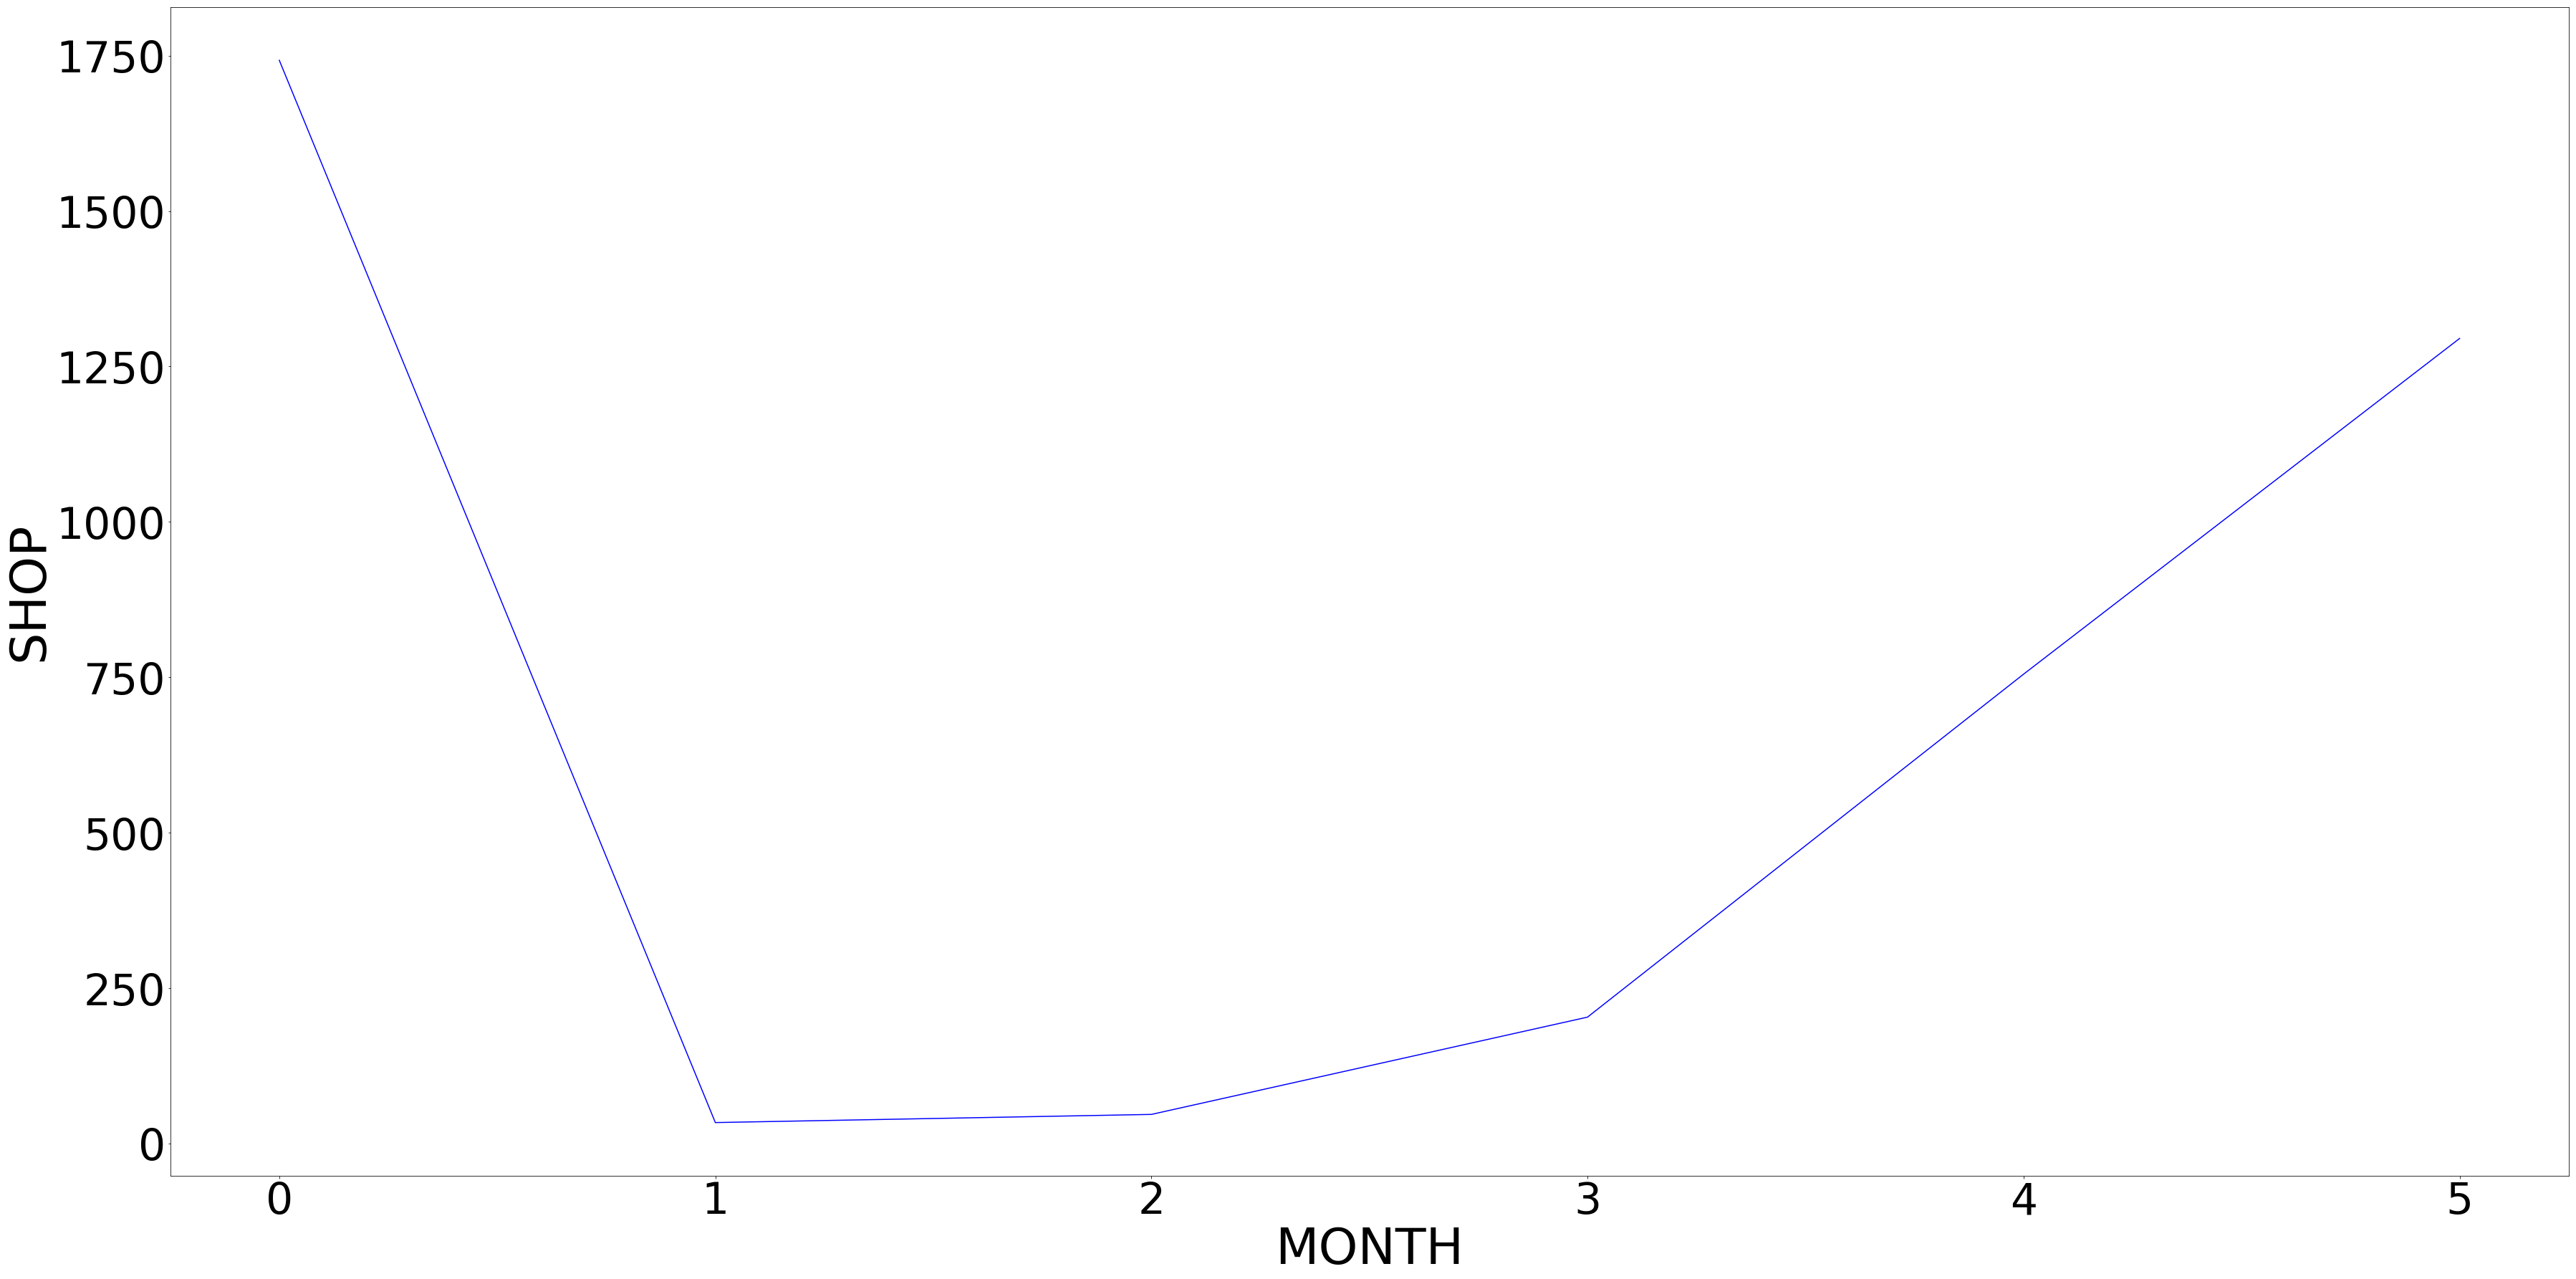

In [32]:
# NON MOLTO SENSATO, MEGLIO CONSIDERARE IL CUMULATED SHOP O ANCORA MEGLIO IL CUMULATED NET SHOP
x = np.arange(6)
for SAMPLE in df1.index:
    outgoing_amt = []
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt)
    plt.plot(x, outgoing_amt, c=df1.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP", size=70)

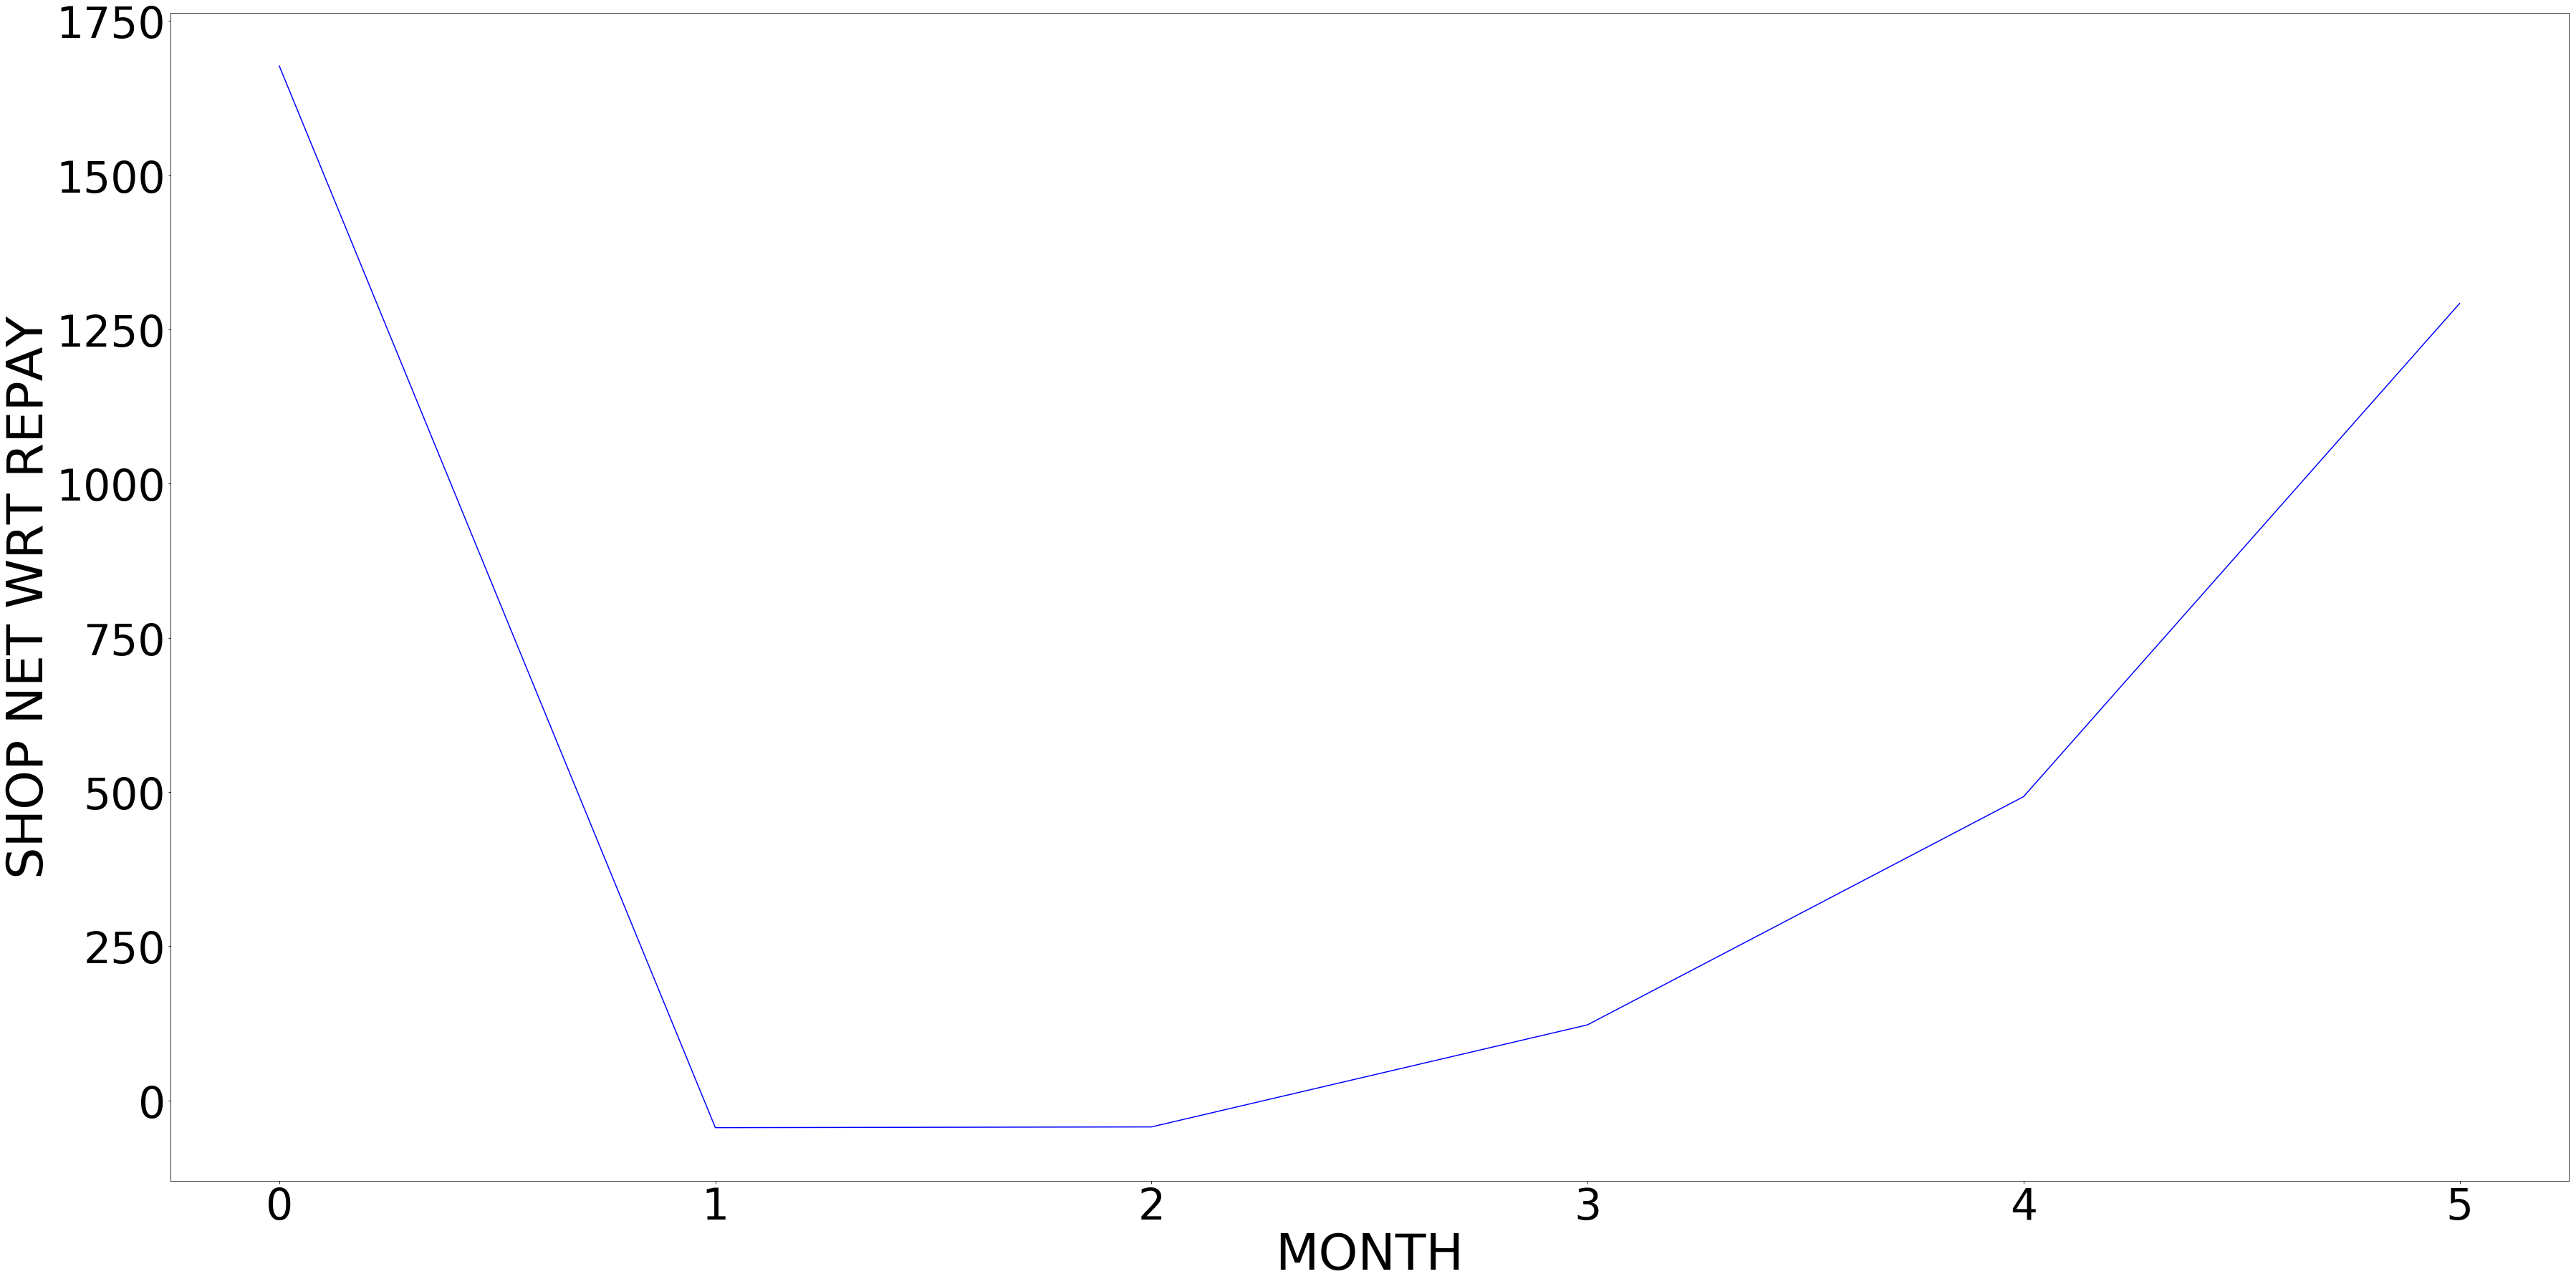

In [33]:
for SAMPLE in df2.index:
    outgoing_amt_net = []
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net)
    plt.plot(x, outgoing_amt_net, c=df2.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP NET WRT REPAY", size=70)

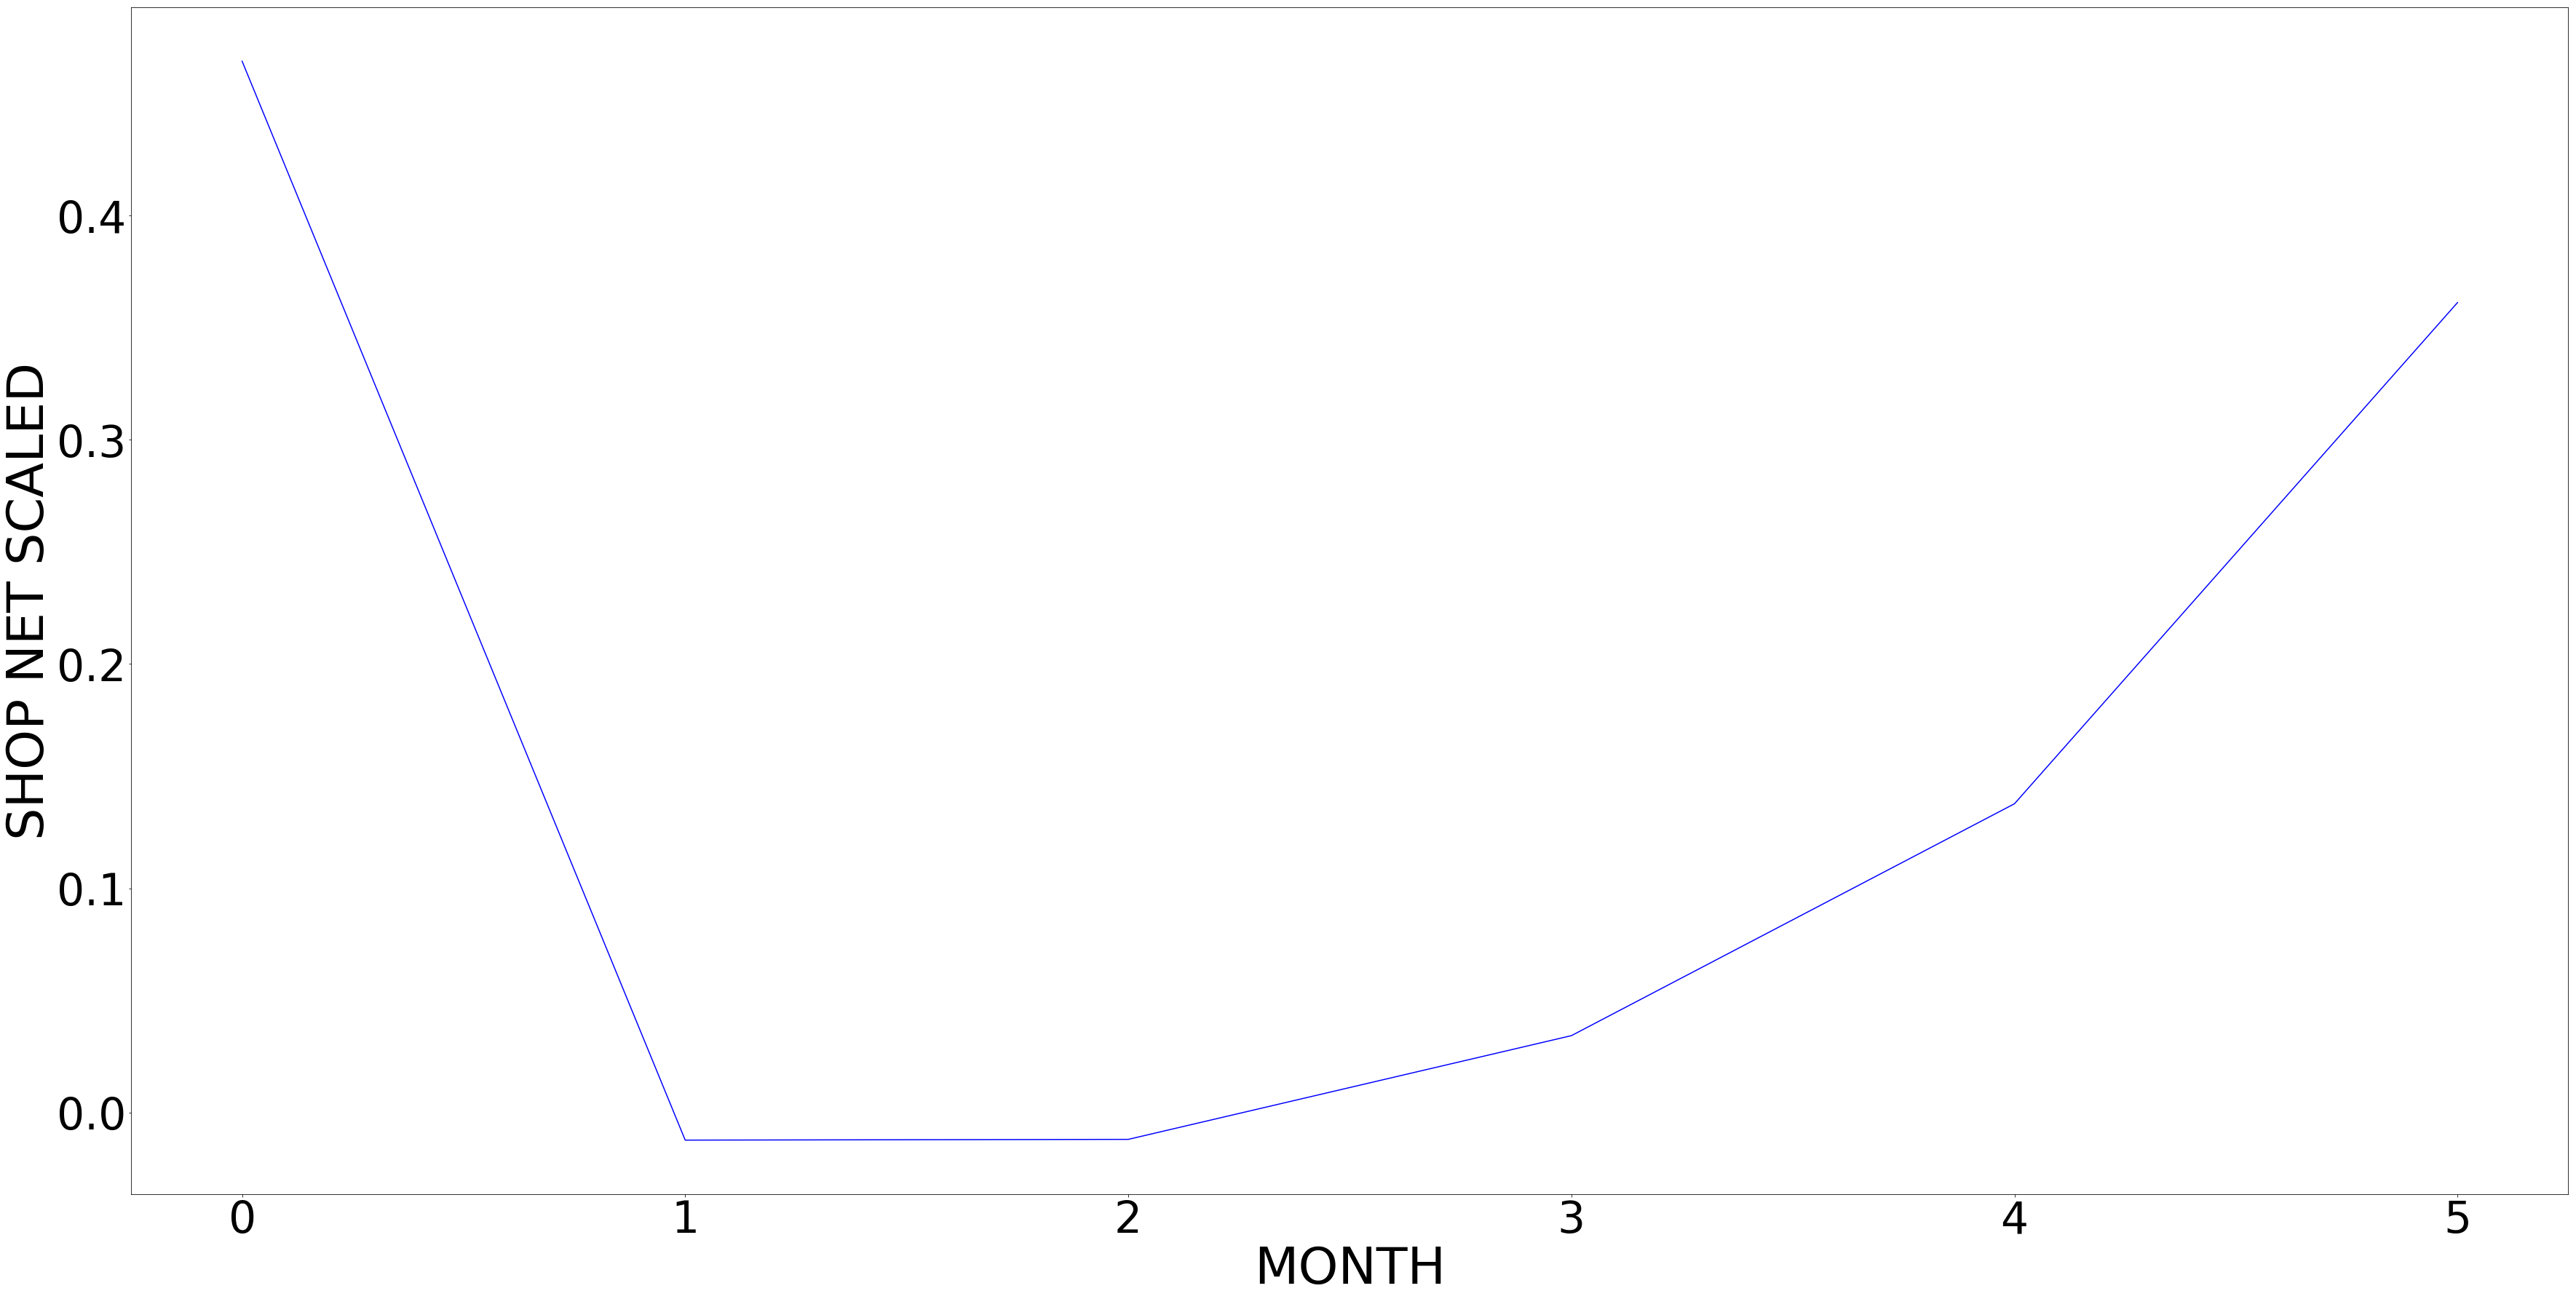

In [34]:
for SAMPLE in df3.index:
    outgoing_amt_net_norm = []
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, outgoing_amt_net_norm, c=df3.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP NET SCALED", size=70)

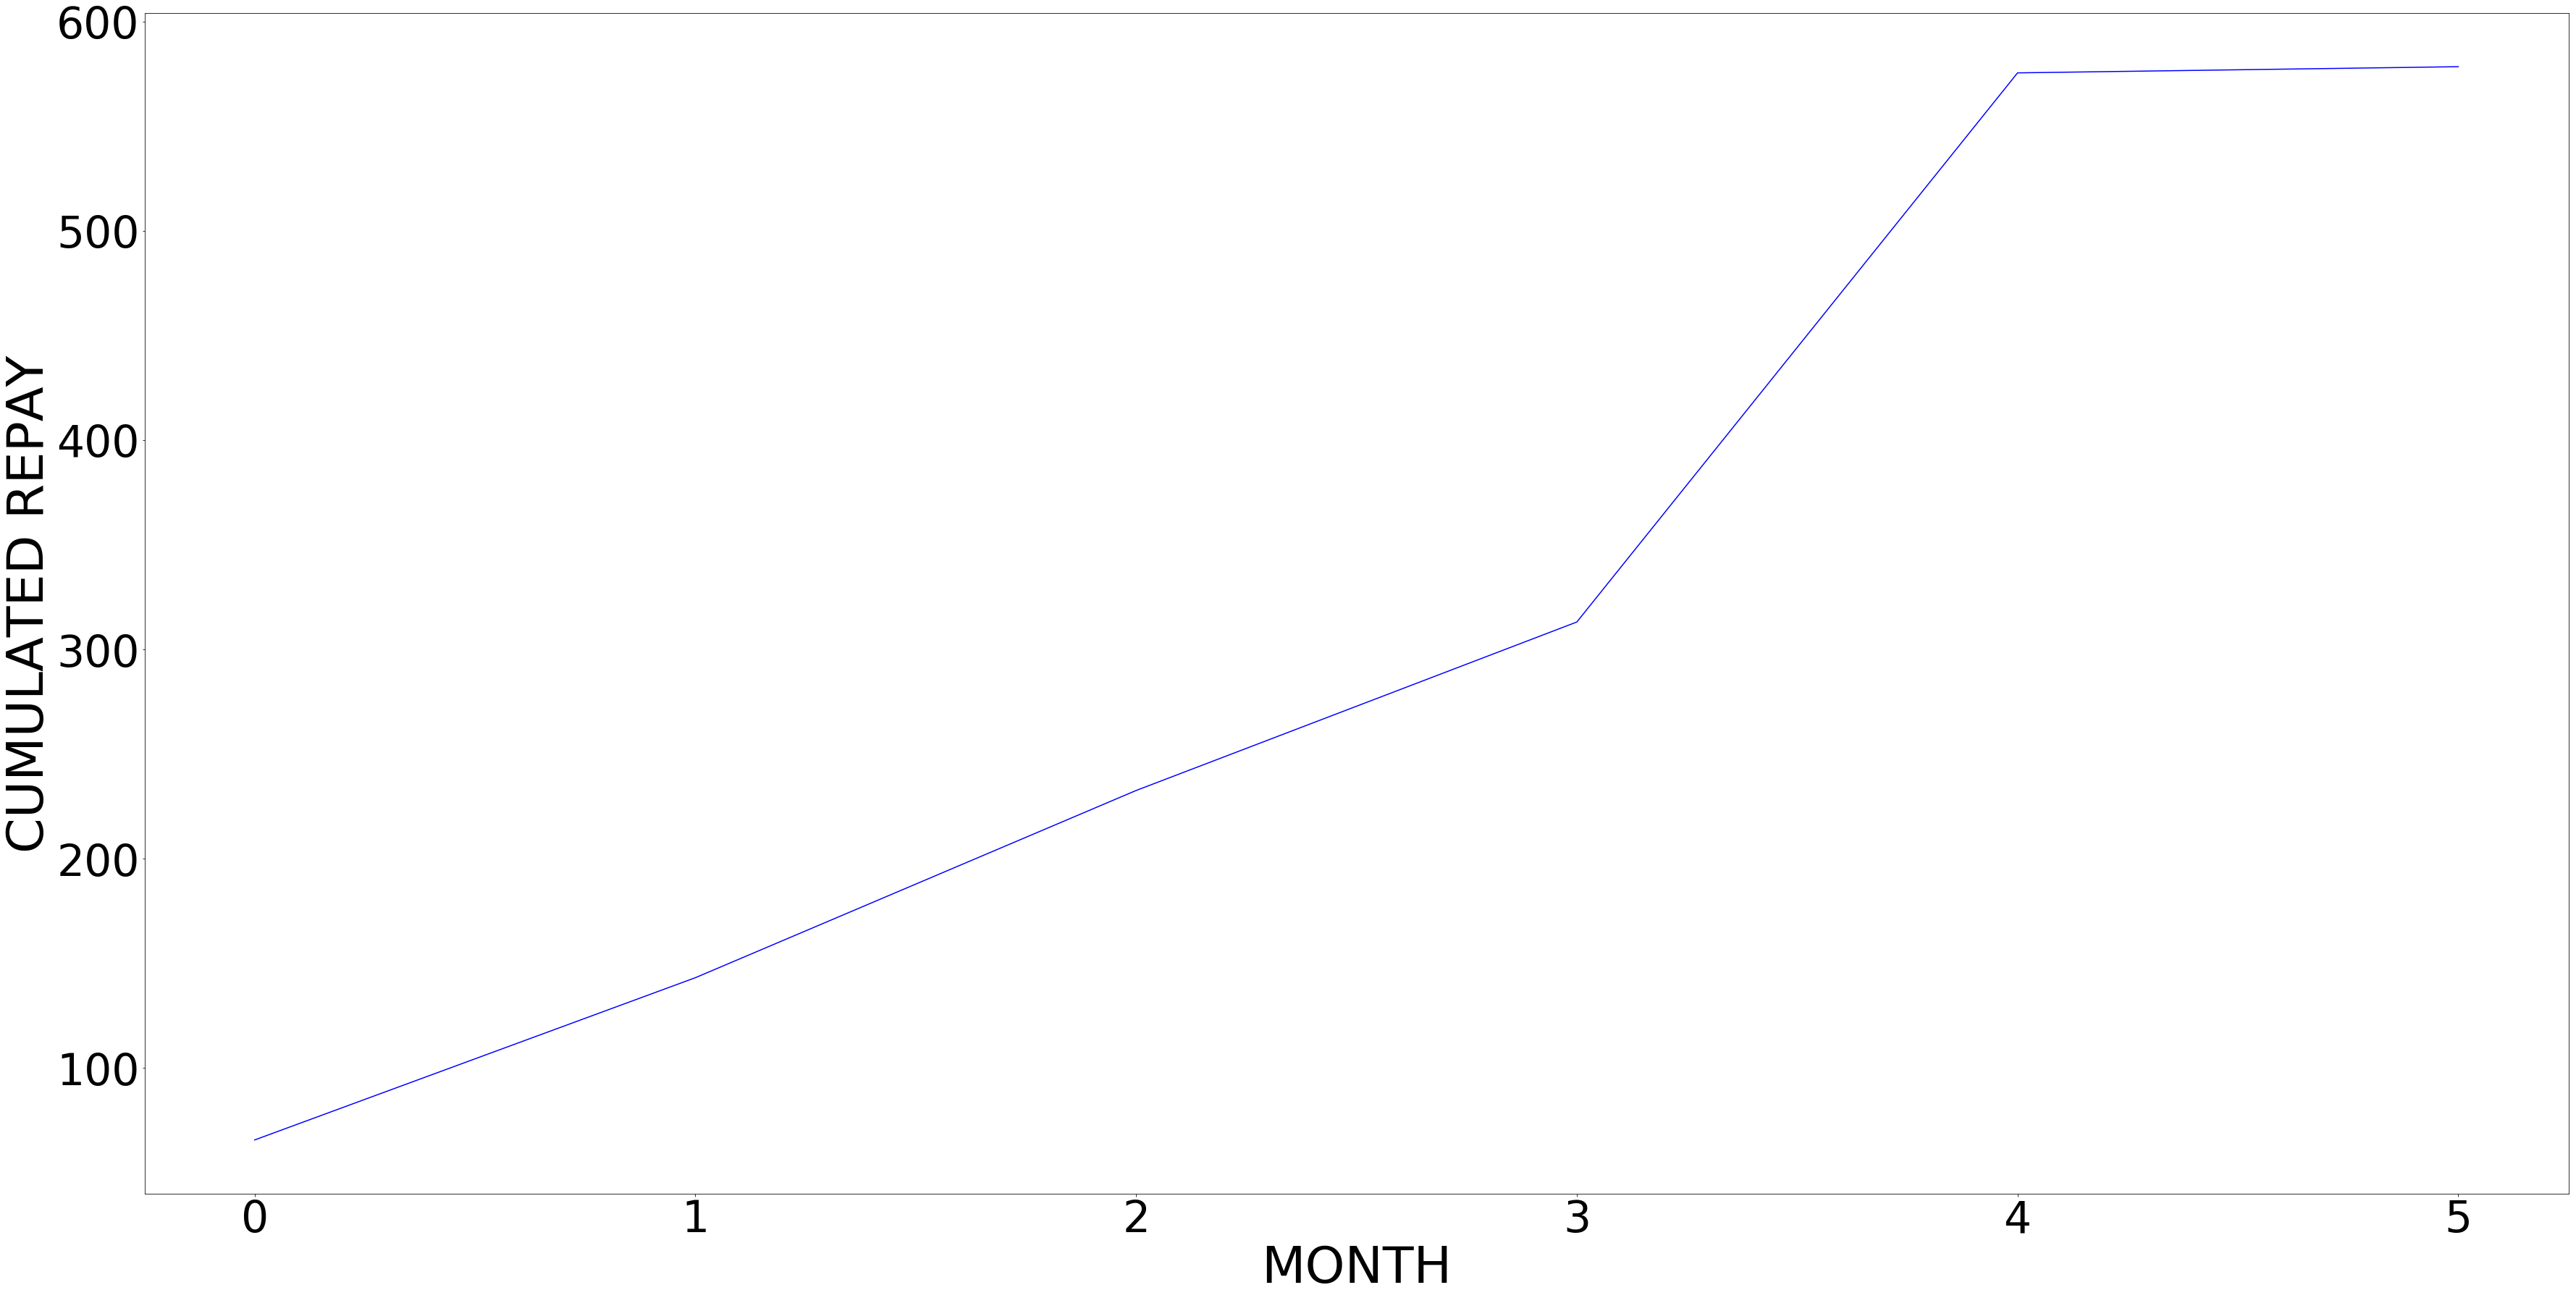

In [38]:
for SAMPLE in df4.index:
    values = []
    values.append(df4.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df4.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED REPAY", size=70)

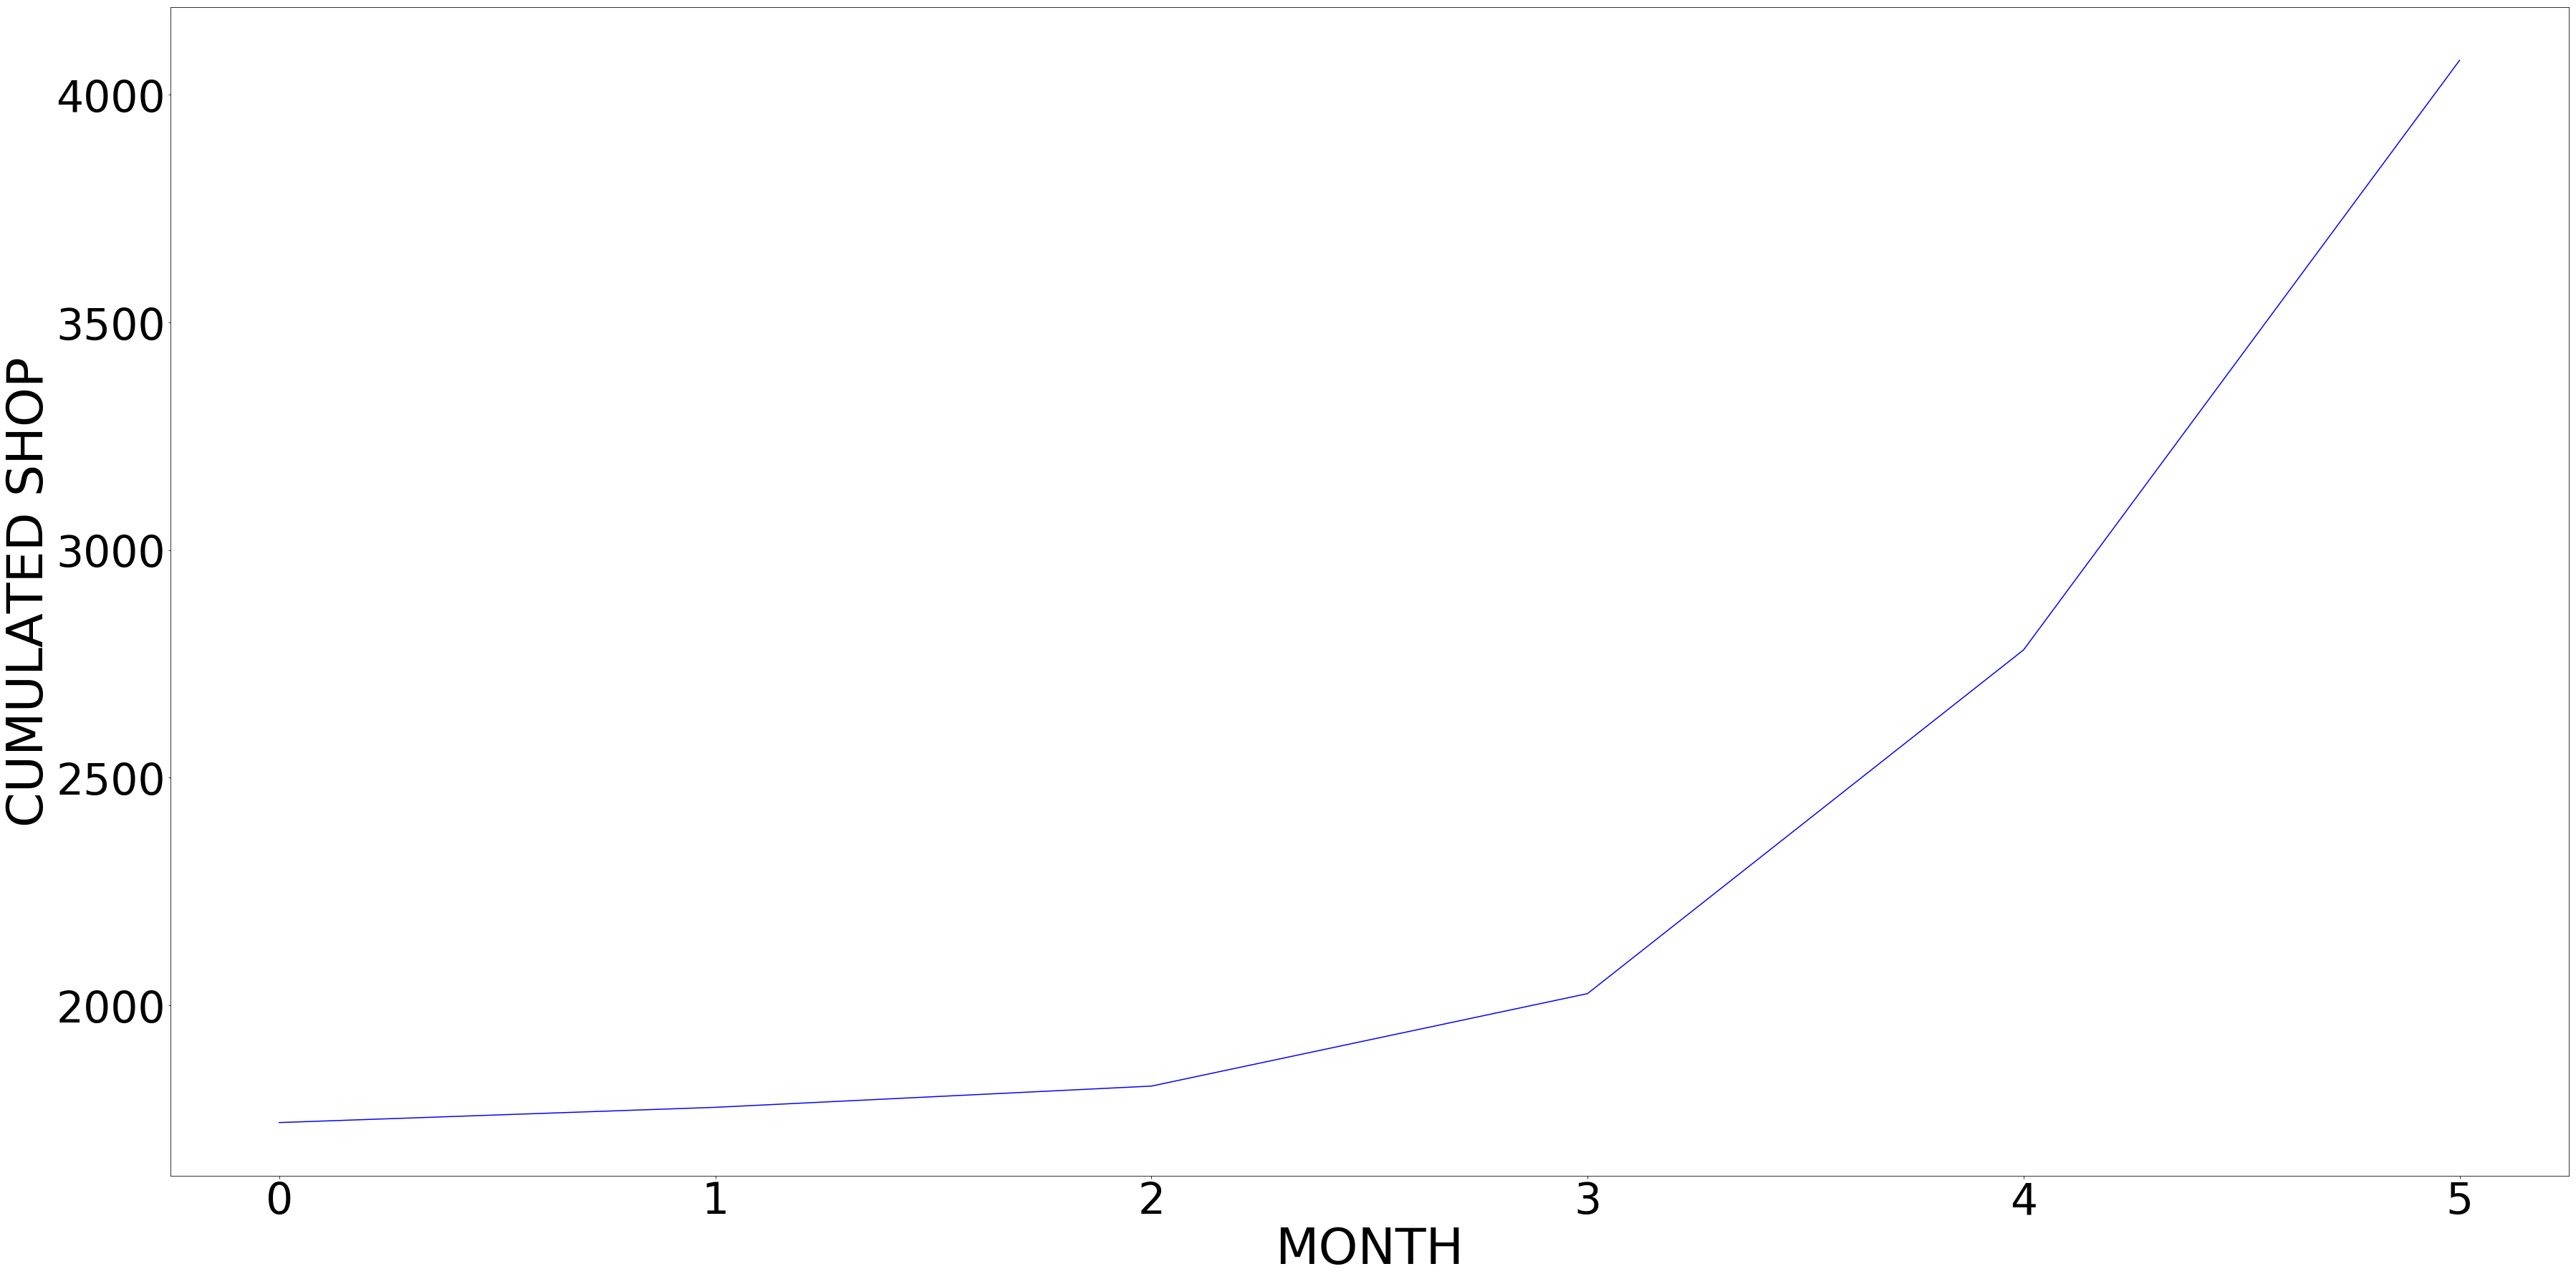

In [36]:
for SAMPLE in df5.index:
    values = []
    values.append(df5.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df5.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED SHOP", size=70)

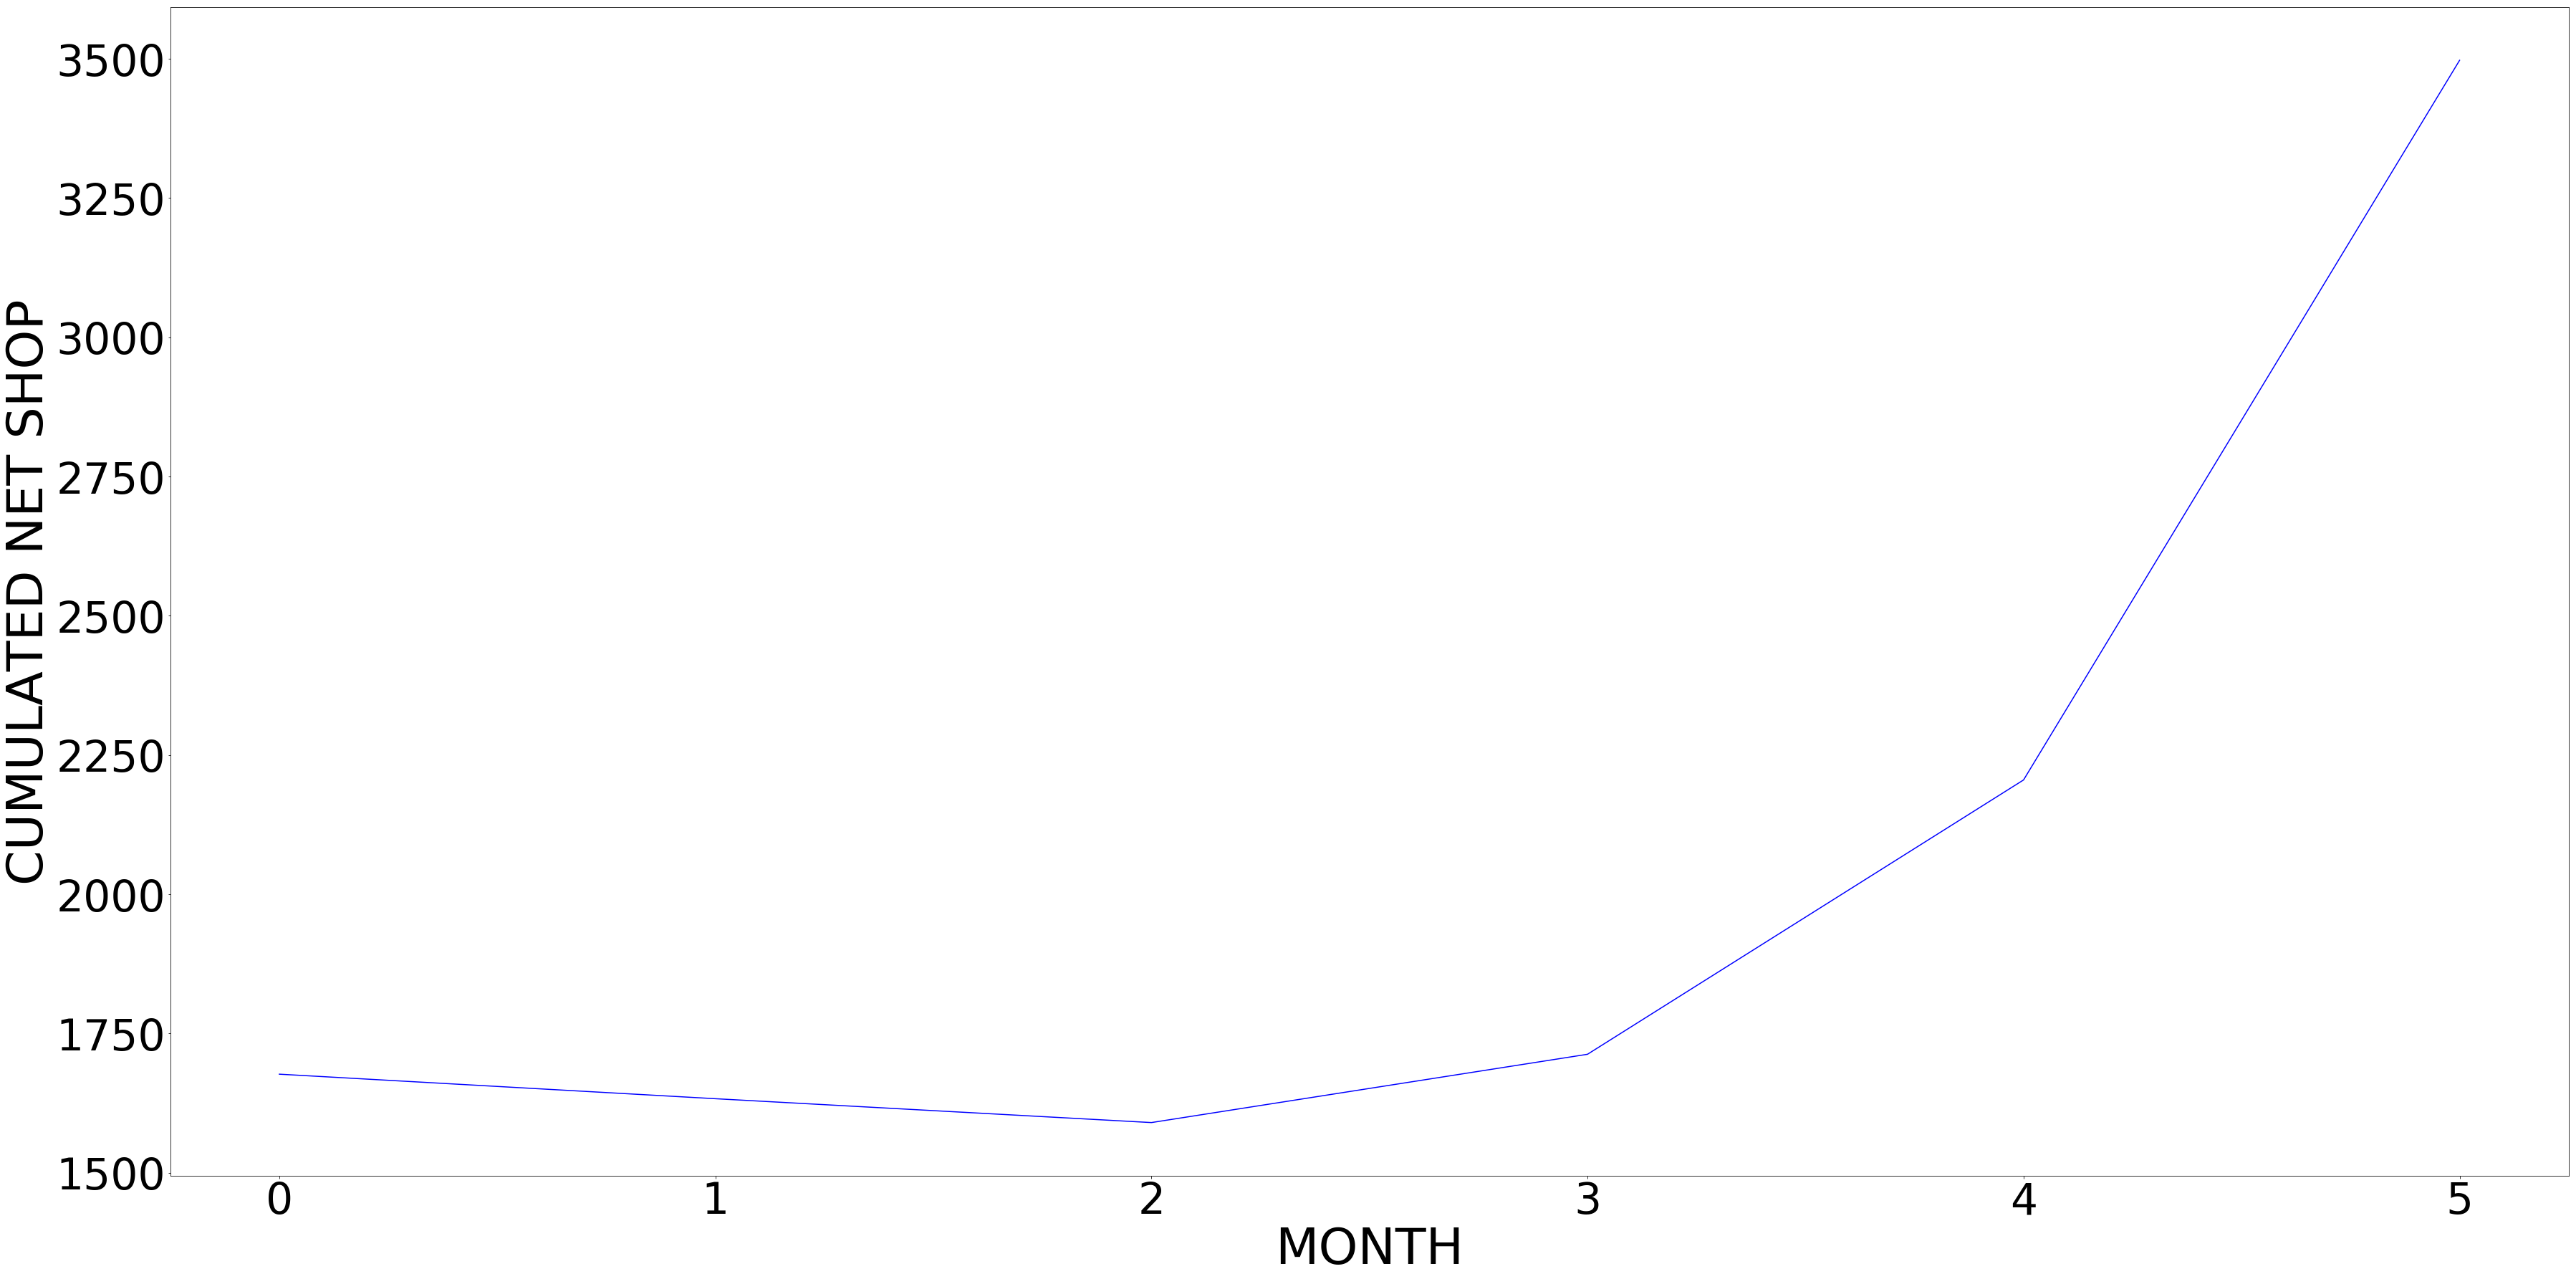

In [39]:
for SAMPLE in df6.index:
    values = []
    values.append(df6.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df6.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED NET SHOP", size=70)

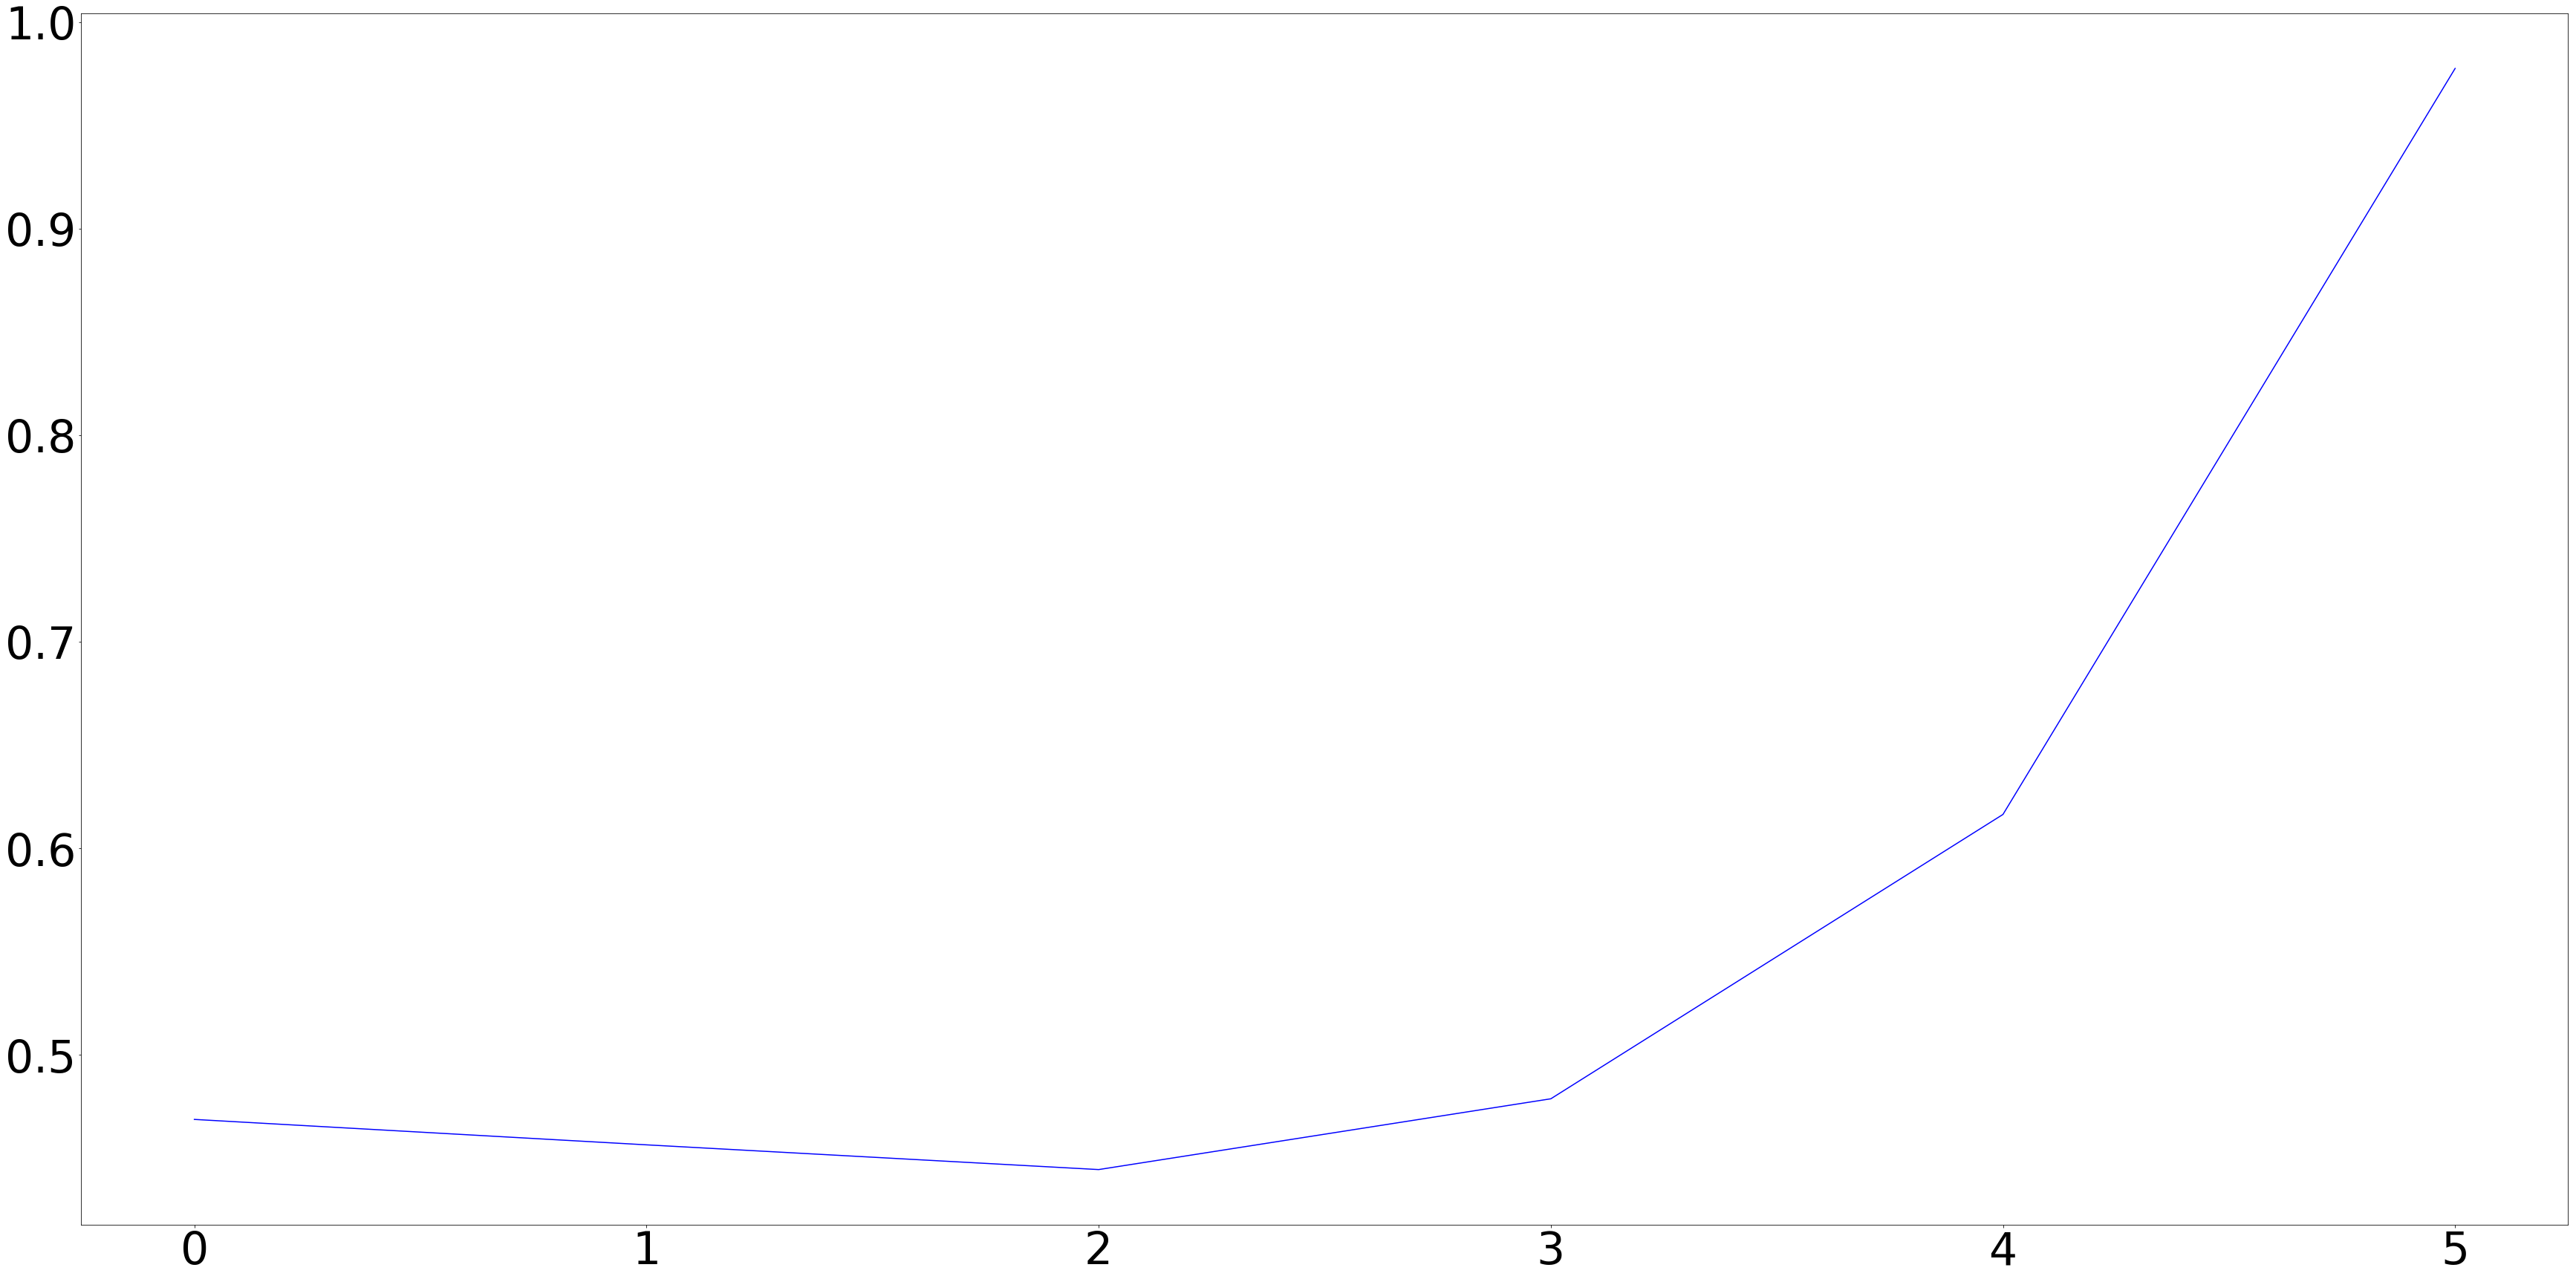

In [40]:
for SAMPLE in df7.index:
    values = []
    values.append(df7.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df7.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df7.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df7.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df7.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df7.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df7.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)